test_kalman.py

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from Kalman import KalmanFilter
from EnsembleKalman import EnsembleKalmanFilter
import pdb


plt.rcParams['figure.figsize'] = (16, 10) # For wide fig

def generateYZ( seed, T, M, H, sig_w = 1, sig_eps = 0.5):
    """
    This function generates data from a linear state space model with measurement
    error. The model has the following form:

    y_t = A*y_t-1 + w_t
    z_t = H*y_t + e_t

    Both error terms (w, e) are assumed to be normal white noise
    """
    np.random.seed(seed)

    dim = M.shape[1]

    w = np.random.multivariate_normal(np.zeros(dim), np.eye(dim), T)
    eps = np.random.multivariate_normal(np.zeros(dim), 0.5*np.eye(dim), T)

    y = np.zeros([T, dim])
    z = np.zeros([T, dim])

    for t in range(T):
        y[t] = np.dot(M,y[t-1]) + w[t]
        z[t] = np.dot(H,y[t]) + eps[t]

    return y, z

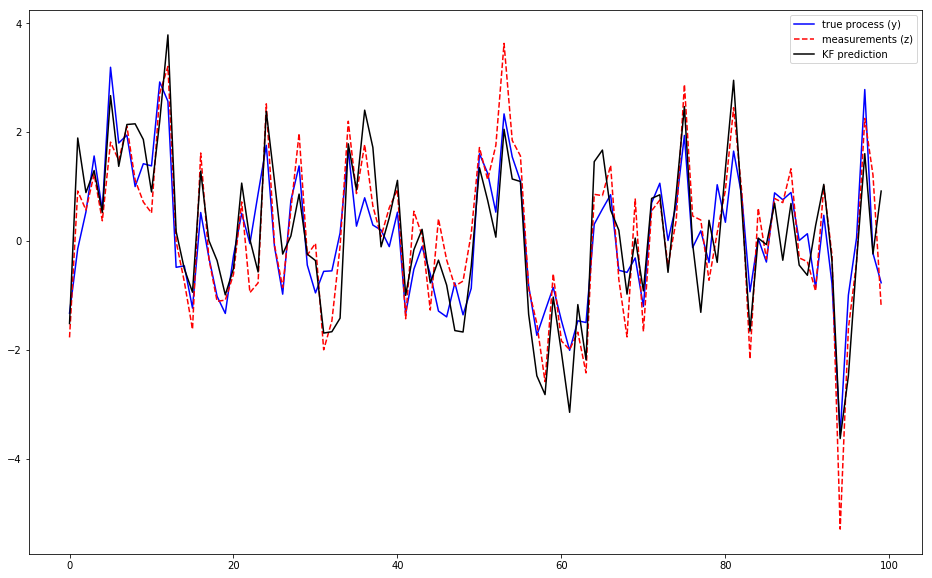

In [16]:
T = 100
Ndim = 2
A = 0.5*np.matrix(np.eye(Ndim))
H = np.matrix(np.eye(Ndim))

y, z = generateYZ( 1988, T, A, H )

KF = KalmanFilter(A, H, np.matrix(np.eye(Ndim)), 0.5*np.matrix(np.eye(Ndim)), x_0=np.zeros(Ndim), u_0=np.zeros(Ndim))
KF = EnsembleKalmanFilter(A, H, np.matrix(np.eye(Ndim)), 0.5*np.matrix(np.eye(Ndim)), x_0=np.zeros(Ndim))

y_filtered = KF.filtr(z)

plt.plot(y[:,0], 'b-')#, label="true process (y)")
plt.plot(z[:,0], 'r--')#, label="measurements (z)")
plt.plot(y_filtered[:,0], 'k-')#, label="KF prediction")
plt.legend(["true process (y)", "measurements (z)", "KF prediction"])
plt.show()